In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv("D:\Dataset\sklearn\Heart\heart.csv")
data.shape

(303, 14)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [20]:
data[data.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output


In [6]:
data.drop_duplicates(keep='first',inplace=True)

In [21]:
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


##  Gender Categorization

206,96


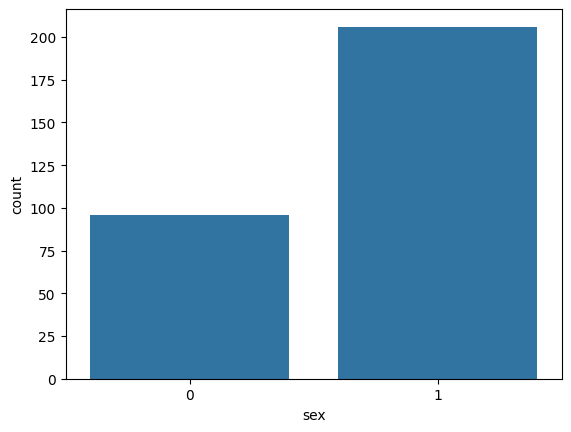

In [7]:
x = (data.sex.value_counts())
# p=sns.countplot(data= data,x = "sex")
print(f'{x[1]},{x[0]}')
x = (data.sex.value_counts())
p=sns.countplot(data= data,x = "sex")

23,86,50,143


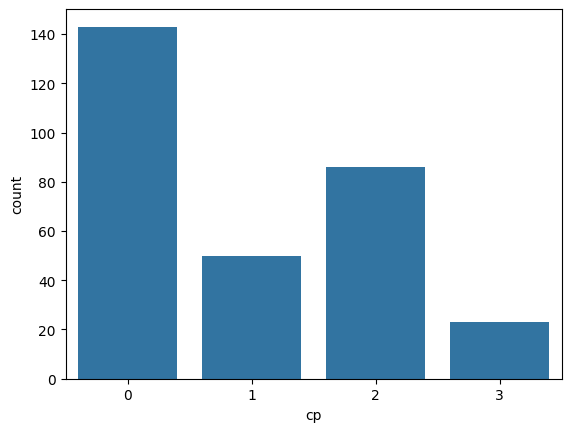

In [8]:
x = (data.cp.value_counts())
print(f'{x[3]},{x[2]},{x[1]},{x[0]}')
p=sns.countplot(data= data,x = "cp")

## Age Distribution

<Figure size 1000x1000 with 0 Axes>

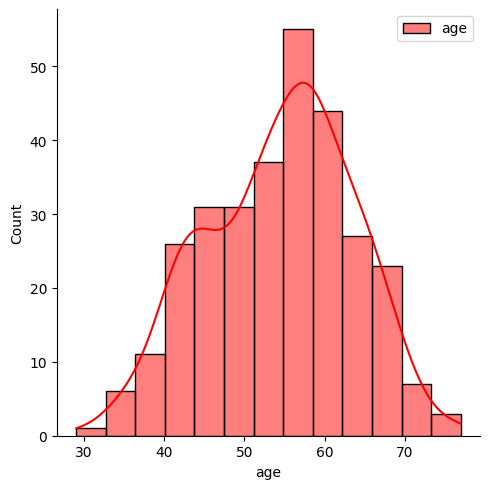

In [9]:
plt.figure(figsize=(10,10))
sns.displot(data.age,color='red',label='age',kde=True)
plt.legend()

<Figure size 1000x1000 with 0 Axes>

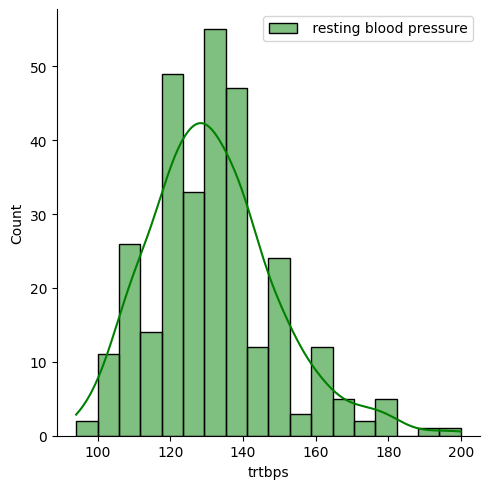

In [10]:
plt.figure(figsize=(10,10))
sns.displot(data.trtbps, color='green', label='resting blood pressure', kde=True)
plt.legend()

C:\Users\Excel\AppData\Local\Temp\ipykernel_5688\3005199796.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['output']==0]['age'],color='green',kde=True)
C:\Users\Excel\AppData\Local\Temp\ipykernel_5688\3005199796.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['output

<Axes: xlabel='age', ylabel='Density'>

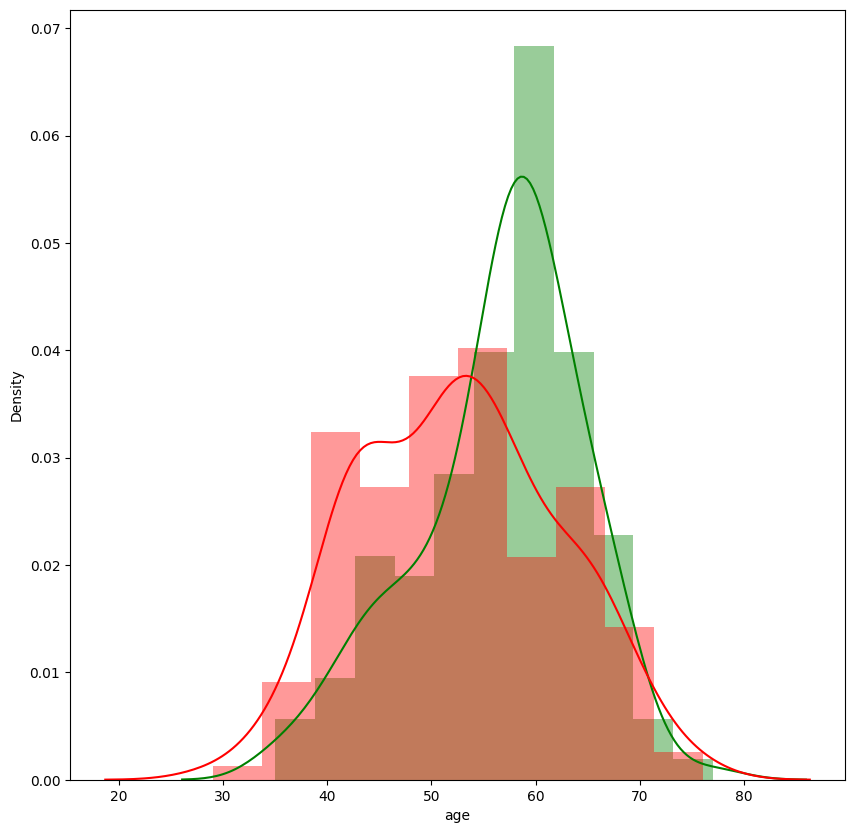

In [11]:
plt.figure(figsize=(10,10))
sns.distplot(data[data['output']==0]['age'],color='green',kde=True)
sns.distplot(data[data['output']==1]['age'],color='red',kde=True)

C:\Users\Excel\AppData\Local\Temp\ipykernel_5688\52905094.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['output']==0]['chol'],color='green',kde=True)
C:\Users\Excel\AppData\Local\Temp\ipykernel_5688\52905094.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['output']=

<Axes: xlabel='chol', ylabel='Density'>

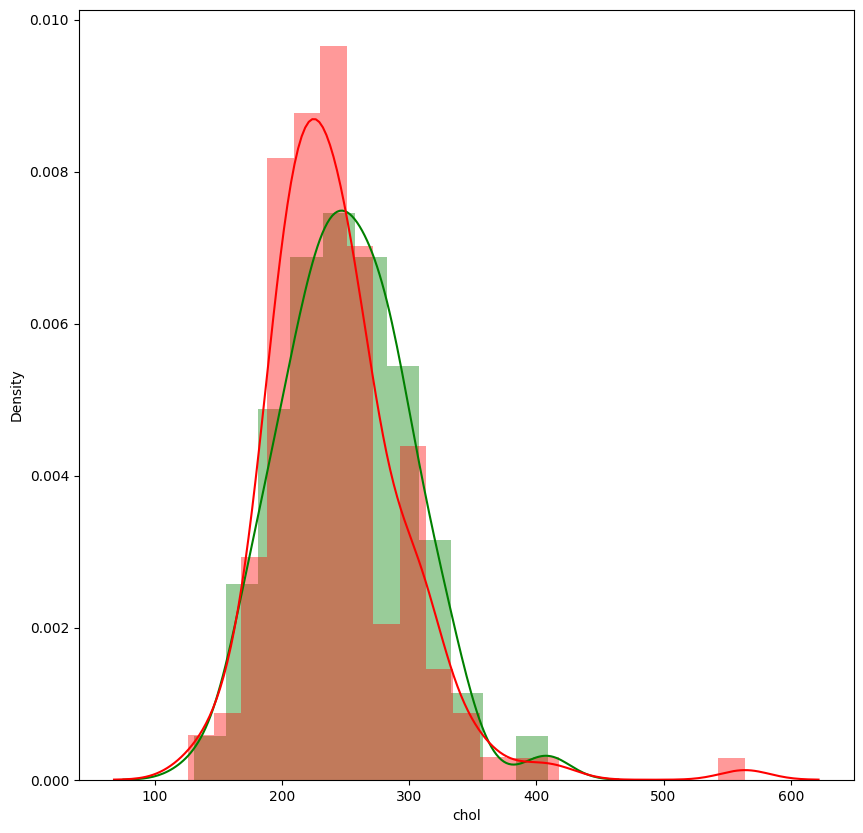

In [12]:
plt.figure(figsize=(10,10))
sns.distplot(data[data['output']==0]['chol'],color='green',kde=True)
sns.distplot(data[data['output']==1]['chol'],color='red',kde=True)

In [13]:
y=data.iloc[:,-1].values
x=data.iloc[:,1:-1].values

In [14]:
# from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42,test_size=0.25 )

In [15]:
x_train.shape

(226, 12)

In [16]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [17]:
# from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [18]:
pred = gnb.predict(x_test)

In [19]:
# from sklearn.metrics import accuracy_score
accuracy_score(pred,y_test)

0.868421052631579